<a href="https://colab.research.google.com/github/Madina069/Python_homework/blob/main/Madina_Magomedova_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 1.1**

In [ ]:
import pandas as pd
import numpy as np
from nltk import download
download('punkt')
download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from pymystem3 import Mystem
mystem = Mystem()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
data = pd.read_csv("/content/elegies.csv")

In [ ]:
data.head()

,id,text,author,year,title
0,343,С дерев на поздний злак полей\nЛисты поблеклые...,Туманский В.И.,1823,Падение листьев
1,488,Только дружба обещает\nМне бессмертия венок;\n...,Батюшков К.Н.,1817,К Г***чу
2,298,Волшебница! твой ненавистен дар!\nТы мертвеца ...,[Н.К.],1822,Коринне
3,323,"Мечты, мечты!\nГде ваша сладость?\nГде ты - гд...",Пушкин А.С.,1831,Элегия
4,14,Лишь сумраком оденутся поля\nИ неба свод покаж...,[А. Сырох-въ],1820,Елегии жителя берегов Чернаго моря


In [ ]:
def preprocess(text):
  return ' '.join([i for i in mystem.lemmatize(text) if i[0].isalpha() and i not in stop_words])

In [ ]:
data["lemmatized"] = data["text"].apply(preprocess)

In [ ]:
data.head()

,id,text,author,year,title,lemmatized
0,343,С дерев на поздний злак полей\nЛисты поблеклые...,Туманский В.И.,1823,Падение листьев,с дерево на поздний злак поле лист поблеклый о...
1,488,Только дружба обещает\nМне бессмертия венок;\n...,Батюшков К.Н.,1817,К Г***чу,только дружба обещать я бессмертие венок он пр...
2,298,Волшебница! твой ненавистен дар!\nТы мертвеца ...,[Н.К.],1822,Коринне,волшебница твой ненавистный дар ты мертвец к с...
3,323,"Мечты, мечты!\nГде ваша сладость?\nГде ты - гд...",Пушкин А.С.,1831,Элегия,мечта мечта где ваш сладость где ты где ты ноч...
4,14,Лишь сумраком оденутся поля\nИ неба свод покаж...,[А. Сырох-въ],1820,Елегии жителя берегов Чернаго моря,лишь сумрак одеваться поле и небо свод показыв...


In [ ]:
data.isnull().values.any()

False

In [ ]:
X = data["text"]

*KMeans и DBSCAN с CountVectorizer*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(X)

CountVectorizer()

In [ ]:
X_cv = vectorizer.transform(X)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples, homogeneity_completeness_v_measure

In [ ]:
num_clusters = [20,30,40]

for i in num_clusters:

    kmeans = KMeans(n_clusters=i, n_init = 10, random_state=42).fit(X_cv)
    silhouette_avg = silhouette_score(X_cv, kmeans.labels_)
    print("For n_clusters=", i,
          "silhouette score=", silhouette_avg)

For n_clusters= 20 silhouette score= 0.09980634031319208
For n_clusters= 30 silhouette score= 0.05268211788591908
For n_clusters= 40 silhouette score= 0.035417797008295955


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cv.toarray())

#Я снижала размерность только для кластеризации с DBSCAN и только с CountVectprizer, т.к. только в этом случае
#снижение размерности привело к улучшению результатов

In [ ]:
for samples in [1, 5, 40]:
    for e in [0.1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X_pca, clusters)
            print(f"For min_samples={samples}, eps={e}:")
            print(f"Estimated number of clusters: {n_clusters}")
            print(f"Silhouette score: {silhouette_avg:.4f}")
        else:
            print(f"For min_samples={samples}, eps={e}:")
            print("Estimated number of clusters: 1 (or all noise points)")
            print("Silhouette score: not applicable (only one cluster or all points are noise)")

For min_samples=1, eps=0.1:
Estimated number of clusters: 460
Silhouette score: 0.1034
For min_samples=1, eps=2:
Estimated number of clusters: 30
Silhouette score: 0.0396
For min_samples=5, eps=0.1:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)
For min_samples=5, eps=2:
Estimated number of clusters: 2
Silhouette score: 0.5586
For min_samples=40, eps=0.1:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)
For min_samples=40, eps=2:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)


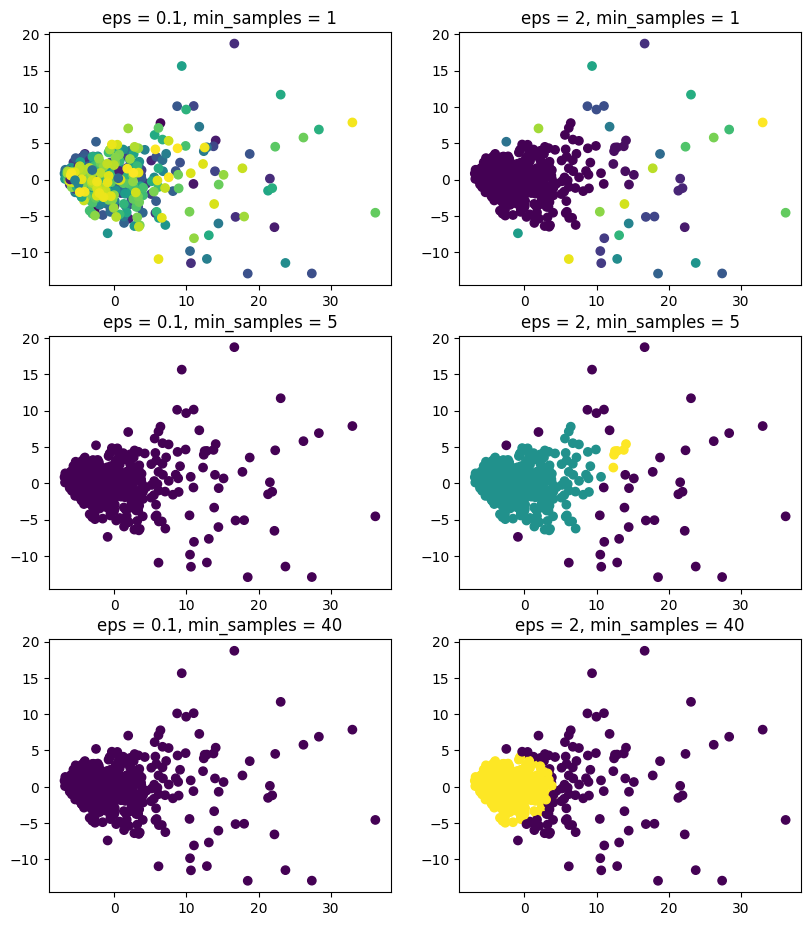

In [ ]:
plt.figure(figsize= (15,23))
i = 1
for samples in [1, 5, 40]:
    for e in [0.1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca)
        plt.subplot(6, 3, i)
        plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

*KMeans и DBSCAN с TfidfVerctorizer*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()

In [ ]:
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
X_tf_idf = tf_idf.transform(X)

In [ ]:
num_clusters = [20,30,40]

for i in num_clusters:

    kmeans = KMeans(n_clusters=i, n_init = 10, random_state=42).fit(X_tf_idf)
    silhouette_avg = silhouette_score(X_tf_idf, kmeans.labels_)
    print("For n_clusters=", i,
          "silhouette score=", silhouette_avg)

For n_clusters= 20 silhouette score= 0.005373796245349937
For n_clusters= 30 silhouette score= 0.0063214876822444265
For n_clusters= 40 silhouette score= 0.010912677288664942


In [ ]:
for samples in [1, 5, 40]:
    for e in [0.1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_tf_idf)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X_tf_idf, clusters)
            print(f"For min_samples={samples}, eps={e}:")
            print(f"Estimated number of clusters: {n_clusters}")
            print(f"Silhouette score: {silhouette_avg:.4f}")
        else:
            print(f"For min_samples={samples}, eps={e}:")
            print("Estimated number of clusters: 1 (or all noise points)")
            print("Silhouette score: not applicable")

For min_samples=1, eps=0.1:
Estimated number of clusters: 506
Silhouette score: 0.0115
For min_samples=1, eps=2:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable
For min_samples=5, eps=0.1:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable
For min_samples=5, eps=2:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable
For min_samples=40, eps=0.1:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable
For min_samples=40, eps=2:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable


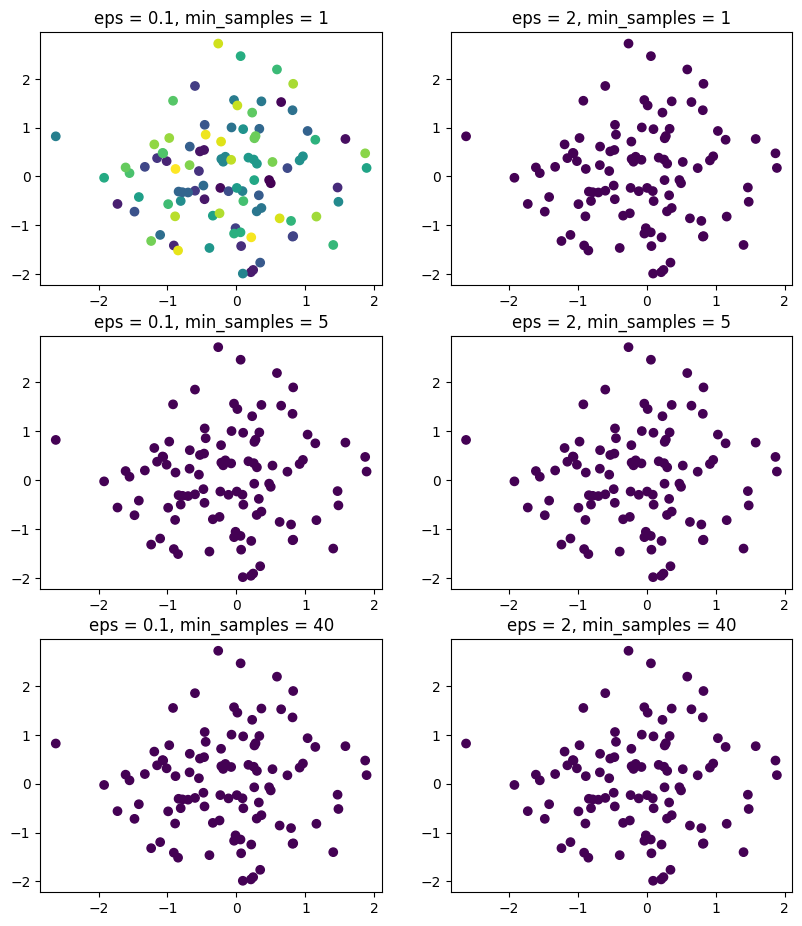

In [ ]:
np.random.seed(42)
X_tf_idf = np.random.randn(100, 2)

plt.figure(figsize=(15, 23))
i = 1
for samples in [1, 5, 40]:
    for e in [0.1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_tf_idf)
        clusters[clusters == -1] = max(clusters) + 1
        plt.subplot(6, 3, i)
        plt.scatter(X_tf_idf[:, 0], X_tf_idf[:, 1], c=clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i += 1

plt.show()

*Предсказания кластеров для тестового множества*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'],
                                                    data['year'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
X_train_new = vectorizer.transform(X_train)
X_test_new = vectorizer.transform(X_test)

In [ ]:
#Кодирование зависимой переменной с помощью Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
y_c = scaler.fit_transform(np.array(data['year']).reshape(-1,1))

In [ ]:
num_clusters = len(np.unique(y_c))
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train_new)

KMeans(n_clusters=21, n_init=10, random_state=42)

In [ ]:
kmeans_preds = kmeans.predict(X_test_new)

In [ ]:
y_c = y_c.ravel()

In [ ]:
print(homogeneity_completeness_v_measure(y_c[:len(kmeans.labels_)], kmeans.labels_))

(0.07716755293876472, 0.14915657198578322, 0.10171295409815302)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [ ]:
#Лучший коэффициент силуета был получен при кластеризации с помощью DBSCAN с использованием CountVectorizer
#после снижения размерности и при гиперпараметрах min_samples = 5 и eps = 2. В данном случае silhouette score = 0.5586,
#а количество кластеров = 2

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(X_pca)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"For min_samples={5}, eps={2}:")
print(f"Estimated number of clusters: {n_clusters}")
print(f"Silhouette score: {silhouette_avg:.4f}")

For min_samples=5, eps=2:
Estimated number of clusters: 2
Silhouette score: 0.5586


# **Задание 1.2**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=3).fit_transform(X_cv)

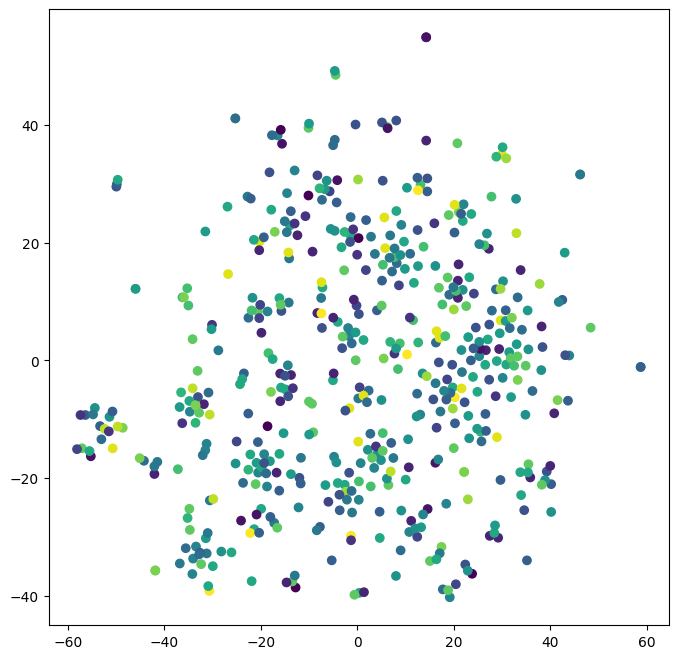

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

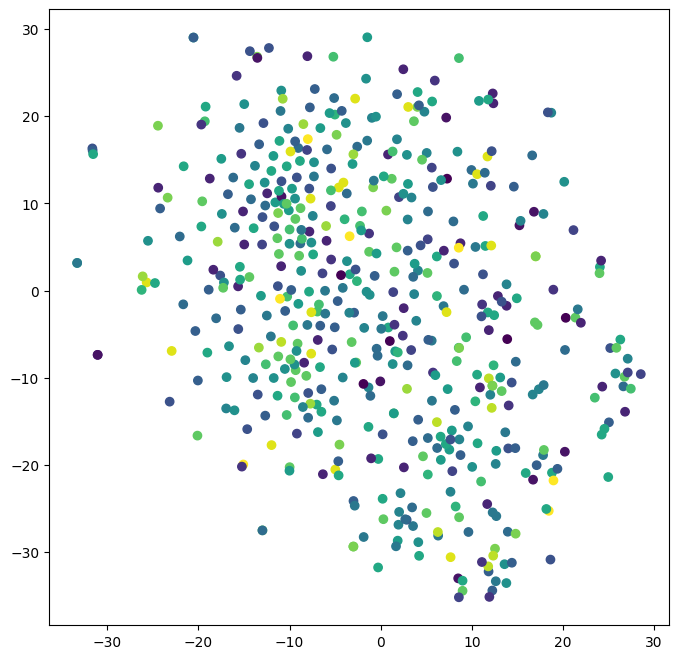

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=7).fit_transform(X_cv)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

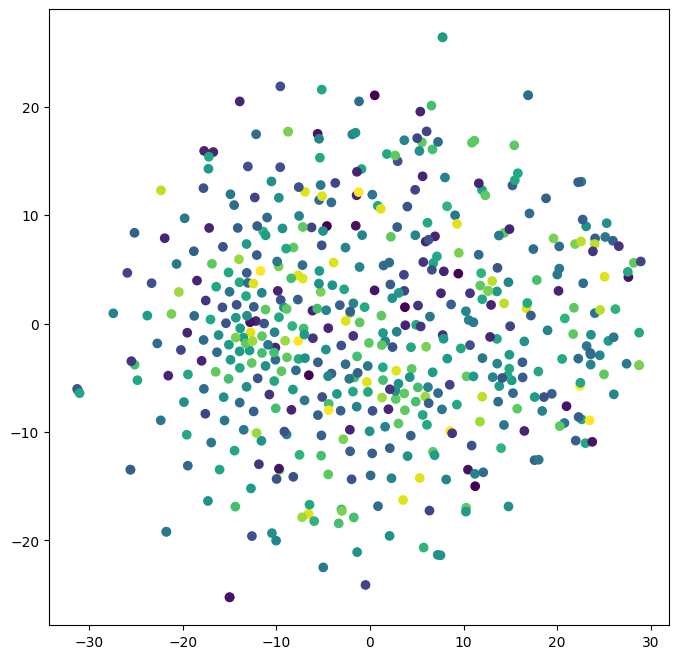

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=10).fit_transform(X_cv)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

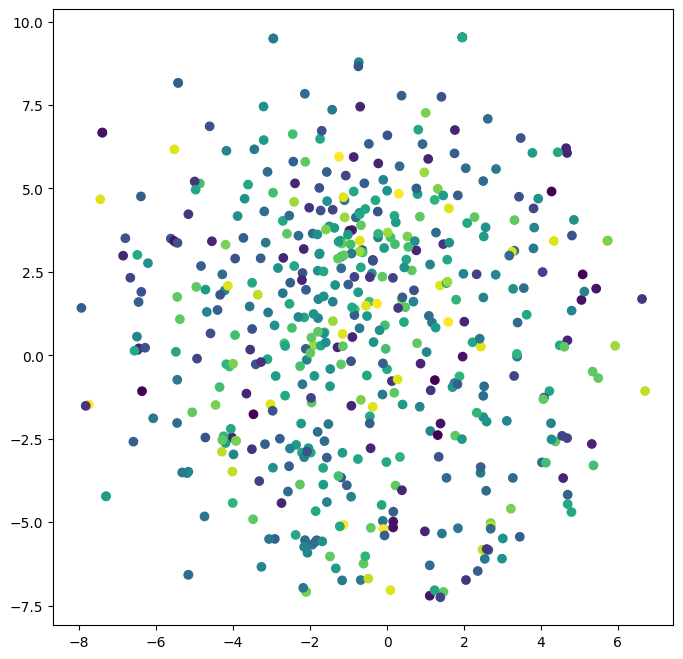

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=20).fit_transform(X_cv)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

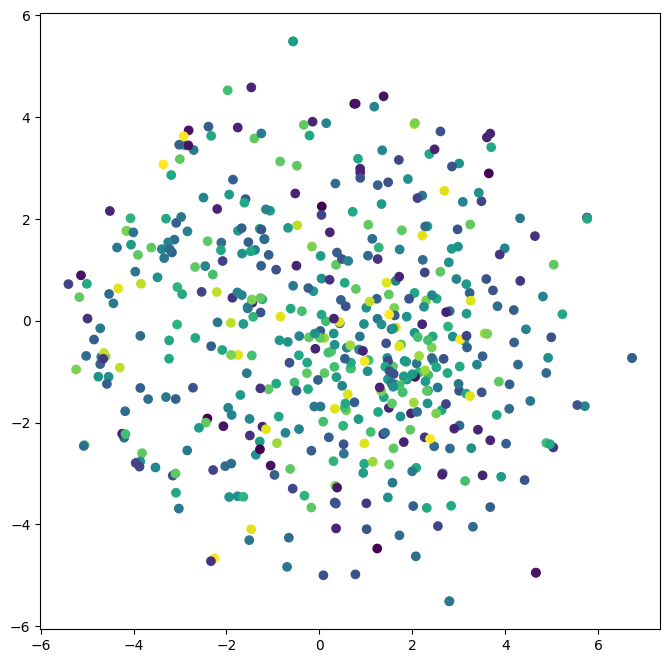

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(X_cv)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

# **Задание 1.3**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

In [ ]:
lda = LatentDirichletAllocation(n_components=20)

lda.fit(X_train_new)

LatentDirichletAllocation(n_components=20)

In [ ]:
lda.components_.shape

(20, 22256)

In [ ]:
#10 самых частотных слов для каждой темы при значании n_components=20.
#Темы не получились интерпретируемыми, т.к. это, в основном, предлоги и местоимения

In [ ]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[::-1][:10]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: не, ты, на, он, их, как, мне, но, от, где
Topic 1: но, часы, меня, ее, наслажденье, драгоценный, пылала, она, устам, тоске
Topic 2: не, на, как, ты, но, все, мне, где, он, что
Topic 3: на, не, мой, ты, мне, но, как, там, час, где
Topic 4: на, как, не, мне, когда, все, но, ты, по, что
Topic 5: не, ты, как, на, мне, мой, но, их, что, меня
Topic 6: не, на, ты, мне, как, для, но, твой, все, меня
Topic 7: не, мне, любви, она, быть, сердце, от, меня, нет, жизни
Topic 8: как, где, ты, любовь, душа, радость, он, над, когда, из
Topic 9: не, ты, на, мне, когда, но, меня, как, все, ее
Topic 10: бог, мне, мою, касаться, свищет, ты, до, заблужденье, ночной, любви
Topic 11: на, где, минувших, бури, как, соренто, лебедь, люблю, часто, сердце
Topic 12: на, не, ты, где, там, тебя, твой, как, но, по
Topic 13: последний, ты, унылой, мой, вас, лист, дружба, плачь, гимен, здесь
Topic 14: как, на, любви, сердце, недолго, меня, луч, сладость, радость, жизни
Topic 15: не, на, мне, но, как, где, когда

In [ ]:
#Разделение текстов тренировочного множества по темам

topics = lda.transform(X_train_new)

In [ ]:
pd.DataFrame(topics).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.995992,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211
1,0.000197,0.000197,0.996260,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197,0.000197
2,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.997754,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118
3,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350,0.993357,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350,0.000350
4,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.979348,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087


In [ ]:
lda.perplexity(X_test_new)

25486992.00934053

In [ ]:
lda.score(X_test_new)

-285990.19285037514

In [ ]:
lda = LatentDirichletAllocation(n_components=100)

lda.fit(X_train_new)

LatentDirichletAllocation(n_components=100)

In [ ]:
lda.perplexity(X_test_new)

3692408185507020.5

In [ ]:
lda.score(X_test_new)

-601121.5767922861

In [ ]:
lda = LatentDirichletAllocation(n_components=200)
lda.fit(X_train_new)

LatentDirichletAllocation(n_components=200)

In [ ]:
lda.perplexity(X_test_new)

2.8338427990557518e+23

In [ ]:
lda.score(X_test_new)

-905598.2928662343

In [ ]:
feature_names = tf_idf.get_feature_names_out()

In [ ]:
#Визуализация наиболее весомых слов первых семи топиков

def plot_top_words(model, feature_names, n_top_words, title, n_components, max_plots=7):

    fig, axes = plt.subplots(1, max_plots, figsize=(25, 10))
    axes = axes.flatten()
    all_features = {}


    for topic_idx, topic in enumerate(model.components_):
      if topic_idx < max_plots:
        top_features_ind = topic.argsort()[:-20 - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 13})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=14)


    plt.show()

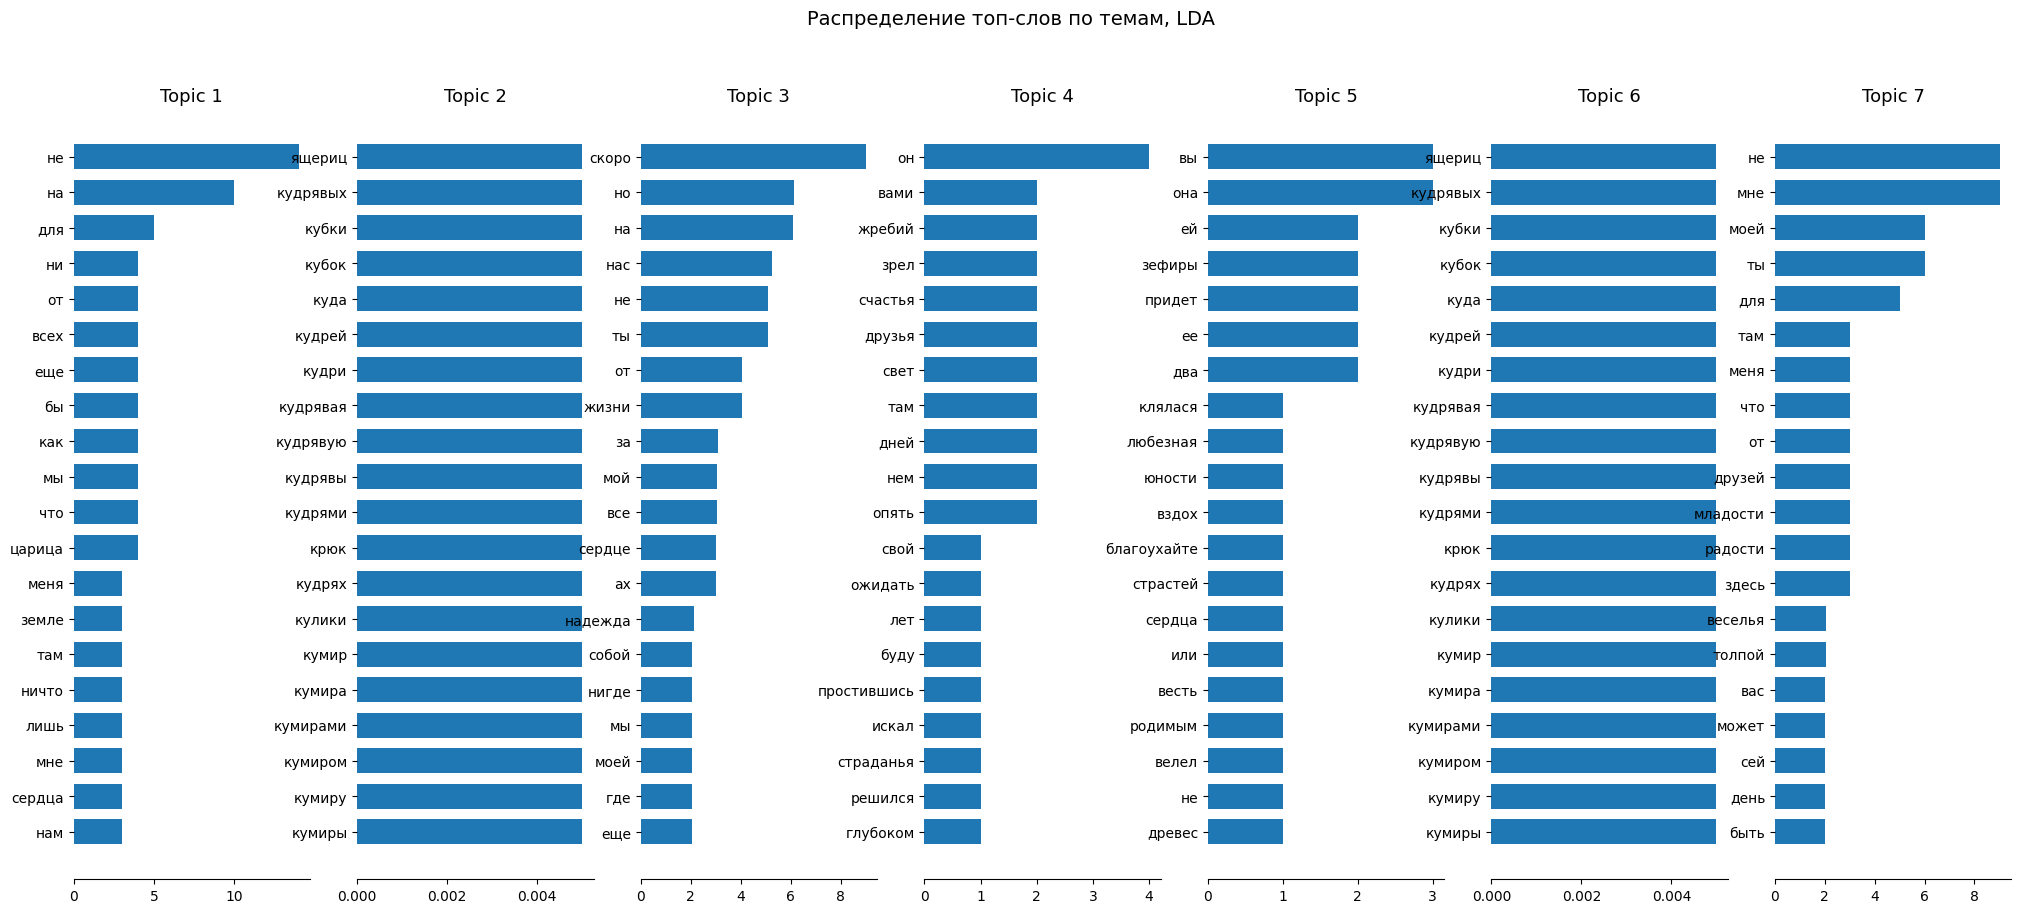

In [ ]:
plot_top_words(lda, feature_names, 30, 'Распределение топ-слов по темам, LDA', n_components=7)

# Задание **2.1**

In [ ]:
df = pd.read_csv('/content/working_df_IA.csv')

In [ ]:
df.head()

,Slovoforma,lemma,part_of_speech,letters_in_slovoforma,slogi_slovoforma,rang_frequency_NKRIA,IA_DWELL_TIME_%,IA_AVERAGE_FIX_PUPIL_SIZE,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_TIME,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_FIXATION_%,IA_REGRESSION_IN,IA_REGRESSION_OUT,IA_REGRESSION_PATH_DURATION,TRIAL_FIXATION_COUNT,sex,grade
0,клубни,клубень,S,6,2,2,0.0057,1338.0,106,9330,1,0.0130,0,0,106,77,m,3
1,снова,снова,ADV,5,2,5,0.0063,1006.0,108,14176,0,0.0130,0,0,108,77,f,2
2,собаки,собака,S,6,3,5,0.0034,1150.0,108,19886,1,0.0094,0,0,108,106,m,2
3,траве,трава,S,5,2,4,0.0123,1360.0,110,298,0,0.0312,1,0,476,32,f,3
4,шуба,шуба,S,4,2,3,0.0023,864.0,112,52850,1,0.0057,0,1,658,174,m,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284 entries, 0 to 5283
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Slovoforma                   5284 non-null   object 
 1   lemma                        5284 non-null   object 
 2   part_of_speech               5284 non-null   object 
 3   letters_in_slovoforma        5284 non-null   int64  
 4   slogi_slovoforma             5284 non-null   int64  
 5   rang_frequency_NKRIA         5284 non-null   int64  
 6   IA_DWELL_TIME_%              5284 non-null   float64
 7   IA_AVERAGE_FIX_PUPIL_SIZE    5284 non-null   float64
 8   IA_FIRST_FIXATION_DURATION   5284 non-null   int64  
 9   IA_FIRST_FIXATION_TIME       5284 non-null   int64  
 10  IA_FIRST_FIX_PROGRESSIVE     5284 non-null   int64  
 11  IA_FIRST_RUN_FIXATION_%      5284 non-null   float64
 12  IA_REGRESSION_IN             5284 non-null   int64  
 13  IA_REGRESSION_OUT 

In [ ]:
#Предобработка и кодиирование независимых переменных

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
set(list(df['part_of_speech']))

{'5', 'A', 'ADV', 'CON', 'NUM', 'P', 'PART', 'PR', 'S', 'V', 'VP'}

In [ ]:
df = df.drop(df[df['part_of_speech'] == '5'].index)

In [ ]:
set(list(df['part_of_speech']))

{'A', 'ADV', 'CON', 'NUM', 'P', 'PART', 'PR', 'S', 'V', 'VP'}

In [ ]:
enc = OneHotEncoder()

In [ ]:
X_cat_encoded = enc.fit_transform(df[['part_of_speech']])

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_to_scale = df[['letters_in_slovoforma', 'slogi_slovoforma', 'rang_frequency_NKRIA']]

In [ ]:
X_scaled = scaler.fit_transform(X_to_scale)

In [ ]:
X = np.concatenate([X_cat_encoded.todense(), X_scaled], axis=1)

In [ ]:
X = np.asarray(X)

In [ ]:
X_train_IA, X_test_IA, y_train_IA, y_test_IA = train_test_split(X,
                                                    df['IA_DWELL_TIME_%'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
#Предсказание времени удержания взгляда на слове по его лингвистическим характеристикам

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [ ]:
knn.fit(X_train_IA, np.array(y_train_IA))

KNeighborsRegressor()

In [ ]:
y_IA_pred_knn = knn.predict(np.array(X_test_IA))

In [ ]:
print("R squared: %.2f" % r2_score(y_test_IA, y_IA_pred_knn))
print("Mean squared error: %.2f" % mean_squared_error(y_test_IA, y_IA_pred_knn))
print('MAE: %.2f' % mean_absolute_error(y_test_IA, y_IA_pred_knn))

R squared: 0.30
Mean squared error: 0.00
MAE: 0.01


In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(X_train_IA, y_train_IA)

Lasso()

In [ ]:
lasso_pred = lasso.predict(X_test_IA)

In [ ]:
def get_scores(y_test, y_pred):
  print('R^2: %.2f' % r2_score(y_test, y_pred))
  print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
  print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

In [ ]:
get_scores(y_test_IA, lasso_pred)

R^2: -0.00
MSE: 0.00
MAE: 0.02


In [ ]:
ridge = Ridge()

In [ ]:
ridge.fit(X_train_IA, y_train_IA)
ridge_pred = ridge.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, ridge_pred)

R^2: 0.20
MSE: 0.00
MAE: 0.01


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [ ]:
model = BaggingRegressor(estimator=LinearRegression(), n_jobs=-1, n_estimators=100)

In [ ]:
model.fit(X_train_IA, y_train_IA)

BaggingRegressor(estimator=LinearRegression(), n_estimators=100, n_jobs=-1)

In [ ]:
bagg_preds = model.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, bagg_preds)

R^2: 0.20
MSE: 0.00
MAE: 0.01


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train_IA, y_train_IA)

RandomForestRegressor()

In [ ]:
rf_preds = rf.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, rf_preds)

R^2: 0.37
MSE: 0.00
MAE: 0.01


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=0, verbose=10, n_iter_no_change=10)

In [ ]:
gbr.fit(X_train_IA, y_train_IA)

      Iter       Train Loss   Remaining Time 
         1           0.0006            0.57s
         2           0.0005            0.47s
         3           0.0005            0.38s
         4           0.0005            0.34s
         5           0.0005            0.31s
         6           0.0005            0.29s
         7           0.0005            0.28s
         8           0.0005            0.27s
         9           0.0005            0.26s
        10           0.0005            0.25s
        11           0.0005            0.24s


GradientBoostingRegressor(n_iter_no_change=10, random_state=0, verbose=10)

In [ ]:
gbr_preds = gbr.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, gbr_preds)

R^2: 0.19
MSE: 0.00
MAE: 0.01


In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor


In [ ]:
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=10))]

In [ ]:
final_estimator = GradientBoostingRegressor(n_estimators=25, random_state=42, verbose=10, n_iter_no_change=10)
reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

In [ ]:
reg.fit(X_train_IA, y_train_IA)

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.08s
         2           0.0005            0.08s
         3           0.0005            0.08s
         4           0.0005            0.07s
         5           0.0004            0.07s
         6           0.0004            0.06s
         7           0.0004            0.06s
         8           0.0004            0.05s
         9           0.0004            0.05s
        10           0.0004            0.05s
        11           0.0004            0.04s


StackingRegressor(estimators=[('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr', KNeighborsRegressor(n_neighbors=10))],
                  final_estimator=GradientBoostingRegressor(n_estimators=25,
                                                            n_iter_no_change=10,
                                                            random_state=42,
                                                            verbose=10))

In [ ]:
reg_preds = reg.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, reg_preds)

R^2: 0.31
MSE: 0.00
MAE: 0.01


In [ ]:
#Из всех использованных ансамблевых и неансамблевых моделей лучше всего с задачей справился Random Forest Regressor, так как
# R²с ним достигает наивысшего значения = 0.37. MSE во всех использованных моделях равна 0.00, а MAE - почти во всех моделях, кроме Lasso равна 0.01,
#что свидетельствует о хорошем качестве прогнозирования.

## **Задание 2.2**

In [ ]:
import re

X = [column for column in df.columns if re.match(r'IA_', column)]

X.append('TRIAL_FIXATION_COUNT')

X = df[X]

In [ ]:
df.head()

,Slovoforma,lemma,part_of_speech,letters_in_slovoforma,slogi_slovoforma,rang_frequency_NKRIA,IA_DWELL_TIME_%,IA_AVERAGE_FIX_PUPIL_SIZE,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_TIME,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_FIXATION_%,IA_REGRESSION_IN,IA_REGRESSION_OUT,IA_REGRESSION_PATH_DURATION,TRIAL_FIXATION_COUNT,sex,grade
0,клубни,клубень,S,6,2,2,0.0057,1338.0,106,9330,1,0.0130,0,0,106,77,m,3
1,снова,снова,ADV,5,2,5,0.0063,1006.0,108,14176,0,0.0130,0,0,108,77,f,2
2,собаки,собака,S,6,3,5,0.0034,1150.0,108,19886,1,0.0094,0,0,108,106,m,2
3,траве,трава,S,5,2,4,0.0123,1360.0,110,298,0,0.0312,1,0,476,32,f,3
4,шуба,шуба,S,4,2,3,0.0023,864.0,112,52850,1,0.0057,0,1,658,174,m,2


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, 0 to 5283
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IA_DWELL_TIME_%              5235 non-null   float64
 1   IA_AVERAGE_FIX_PUPIL_SIZE    5235 non-null   float64
 2   IA_FIRST_FIXATION_DURATION   5235 non-null   int64  
 3   IA_FIRST_FIXATION_TIME       5235 non-null   int64  
 4   IA_FIRST_FIX_PROGRESSIVE     5235 non-null   int64  
 5   IA_FIRST_RUN_FIXATION_%      5235 non-null   float64
 6   IA_REGRESSION_IN             5235 non-null   int64  
 7   IA_REGRESSION_OUT            5235 non-null   int64  
 8   IA_REGRESSION_PATH_DURATION  5235 non-null   int64  
 9   TRIAL_FIXATION_COUNT         5235 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 449.9 KB


In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.00877193, 0.31996945, 0.06865672, ..., 0.        , 0.0010203 ,
        0.22397476],
       [0.01027569, 0.19320351, 0.07014925, ..., 0.        , 0.00105431,
        0.22397476],
       [0.00300752, 0.24818633, 0.07014925, ..., 0.        , 0.00105431,
        0.31545741],
       ...,
       [0.22180451, 0.44450935, 0.38358209, ..., 0.        , 0.06128626,
        0.74763407],
       [0.3641604 , 0.24226804, 0.12089552, ..., 0.        , 0.1057035 ,
        0.43533123],
       [0.25639098, 0.23866743, 0.12089552, ..., 0.        , 0.17712478,
        0.93375394]])

In [ ]:
X_train_IA_new, X_test_IA_new, y_train_IA_new, y_test_IA_new = train_test_split(X_scaled, df['sex'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
X_scaled_new = scaler.fit_transform(X_train_IA_new)

In [ ]:
X_scaled_new

array([[0.0433584 , 0.31638418, 0.19253731, ..., 0.        , 0.00415418,
        0.18611987],
       [0.05964912, 0.64526293, 0.27462687, ..., 0.        , 0.01036708,
        0.37223975],
       [0.0112782 , 0.26756628, 0.07910448, ..., 0.        , 0.25792695,
        0.91167192],
       ...,
       [0.25388471, 0.49215558, 0.25970149, ..., 0.        , 0.09330368,
        0.36277603],
       [0.22330827, 0.54935246, 0.7358209 , ..., 0.        , 0.31762954,
        0.64037855],
       [0.04461153, 0.22903086, 0.12089552, ..., 0.        , 0.00647023,
        0.25867508]])

In [ ]:
#Кодирование зависимой переменной

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(y_train_IA_new)

LabelEncoder()

In [ ]:
le.classes_

array(['f', 'm'], dtype=object)

In [ ]:
y_train_IA_new = le.transform(y_train_IA_new)
y_test_IA_new = le.transform(y_test_IA_new)

In [ ]:
#Предсказание пола испытуемого по глазодвигательной активности

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42, class_weight='balanced')

In [ ]:
clf.fit(X_train_IA_new, y_train_IA_new)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test_pred_ = clf.predict(X_test_IA_new)

In [ ]:
print(classification_report(y_test_IA_new, y_test_pred_, target_names=le.classes_))

              precision    recall  f1-score   support

           f       0.71      0.58      0.64       708
           m       0.37      0.52      0.43       339

    accuracy                           0.56      1047
   macro avg       0.54      0.55      0.53      1047
weighted avg       0.60      0.56      0.57      1047



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_scaled_new, y_train_IA_new)

MultinomialNB()

In [ ]:
y_test_pred_nb = nb.predict(X_test_IA_new)

In [ ]:
print(classification_report(y_test_IA_new, y_test_pred_nb, target_names=le.classes_))

              precision    recall  f1-score   support

           f       0.68      1.00      0.81       708
           m       0.00      0.00      0.00       339

    accuracy                           0.68      1047
   macro avg       0.34      0.50      0.40      1047
weighted avg       0.46      0.68      0.55      1047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train_IA_new, y_train_IA_new)

In [ ]:
y_test_pred_GB = clf_GB.predict(X_test_IA_new)

In [ ]:
print(classification_report(y_test_IA_new, y_test_pred_GB, target_names=le.classes_))

              precision    recall  f1-score   support

           f       0.82      0.89      0.85       708
           m       0.71      0.58      0.64       339

    accuracy                           0.79      1047
   macro avg       0.76      0.74      0.75      1047
weighted avg       0.78      0.79      0.78      1047



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_IA_new, y_train_IA_new)

In [ ]:
y_test_pred_RF = clf_RF.predict(X_test_IA_new)

In [ ]:
print(classification_report(y_test_IA_new, y_test_pred_RF, target_names=le.classes_))

              precision    recall  f1-score   support

           f       0.68      1.00      0.81       708
           m       0.00      0.00      0.00       339

    accuracy                           0.68      1047
   macro avg       0.34      0.50      0.40      1047
weighted avg       0.46      0.68      0.55      1047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [ ]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)),
              ('bag', BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0))]

In [ ]:
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
clf_stacking.fit(X_train_IA_new, y_train_IA_new)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=1,
                                                           random_state=42)),
                               ('bag',
                                BaggingClassifier(estimator=SVC(),
                                                  random_state=0))],
                   final_estimator=LogisticRegression())

In [ ]:
clf_stacking_preds = clf_stacking.predict(X_test_IA_new)

In [ ]:
print(classification_report(y_test_IA_new, clf_stacking_preds, target_names=le.classes_))

              precision    recall  f1-score   support

           f       0.86      0.91      0.88       708
           m       0.78      0.68      0.73       339

    accuracy                           0.83      1047
   macro avg       0.82      0.79      0.80      1047
weighted avg       0.83      0.83      0.83      1047



In [ ]:
#Все классификаторы справились довольно неплохо с данными, относящимися к женскому полу. Multinomial NB и Random Forest Classifier
#не справились с данными,относящимися к мужскому полу, при этом recall для объектов, относящихся к классу 'f' достигает 1,
#что означает, что классификаторы правильно классифицировали все объекты данного класса.
#Наилучшие общие результаты показал Stacking Classifier: у него F1 Score достигает наивысшего значения 0.88.

SyntaxError: invalid syntax (<ipython-input-164-34b357d0d110>, line 1)